# Health Survey Data Analysis

## Marie-Gisele Boyogueno

## Executive Summary


    
In this project, we are trying to underdsand if there is a relationship between chronic health and the economical dimension of the population ability to own or rent a house.
We will gather information of the health data from the 2020-2021 survey of the state of NYC; a subset data of the survey responses 
conducted by the CDC Behavioral Risk Factor Surveillance System(BRFSS). We will then visualise, and compare the data of the main variables
of interest in this dataset, which are the health component: 'PHYSHLTH' and the economic component: 'RENTHOM1'. 
Finally, we will conduct some statistical tests that will help us interpret  and confirm our results.  

## 1. Data preparation  for Statistical Analysis

## The Data
   
The data source is from the CDC Behavioral Risk Factor Surveillance System(BRFSS) from 2020-2021,
the Public Health Survey in the United States of America, the focus of this project is the state of New York. 
The data source has 279 colums and a little over 14000 surveys. In that dataset, two of the columns are our primary focus in this project: the phisical health(PHYSHLTH) and the  economical (RENTHOM1) columns.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,36,11,11172020,11,17,2020,1200,2020000001,2020000001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,36,1,1182020,1,18,2020,1200,2020000002,2020000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,36,4,5042020,5,4,2020,1200,2020000003,2020000003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,36,1,1222020,1,22,2020,1200,2020000004,2020000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,36,3,3102020,3,10,2020,1200,2020000005,2020000005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14769 entries, 0 to 14768
Columns: 279 entries, _STATE to _AIDTST4
dtypes: float64(234), int64(45)
memory usage: 31.4 MB


In [4]:
df.shape

(14769, 279)

## Data Preparation

    
    Given that the question in the PHYSHLTH column is asking about "how many days during the past 30 days",
    you might assume that the values in this column will all be numbers between 0 and 30, but this not the case 
    Therefore, we need to prepare the data in both columns of interest to take care of outliers:
- Focus on 'PHYSHLTH' and 'RENTHOM1' columns
- Converting all instances of 88 to 0
- Dropping all records where PHYSHLTH is 77, 99, or blank (NaN)
- Dropping records with values of RENTHOM1 other than 1 or 2
- visualize to confirm our cleaning works
- Run the statistics tests


In [5]:
df1 = df[['PHYSHLTH','RENTHOM1']]
df1

,PHYSHLTH,RENTHOM1
0,88.0,2.0
1,14.0,1.0
2,88.0,2.0
3,5.0,3.0
4,88.0,2.0
...,...,...
14764,88.0,2.0
14765,88.0,2.0
14766,2.0,2.0
14767,88.0,2.0


In [6]:
df1.columns

Index(['PHYSHLTH', 'RENTHOM1'], dtype='object')

In [7]:
df1.value_counts()

PHYSHLTH  RENTHOM1
88.0      1.0         6401
          2.0         3614
          3.0          394
30.0      1.0          389
          2.0          336
                      ... 
26.0      3.0            1
          2.0            1
          1.0            1
22.0      2.0            1
15.0      7.0            1
Length: 114, dtype: int64

In [8]:
# Filter the PHYSHTH column and get the Mean and other aggregation before cleaning
df1['PHYSHLTH'].describe()

count    14769.000000
mean        67.801815
std         34.082730
min          1.000000
25%         30.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [9]:
#checking for Nan
df.isna().sum()

_STATE         0
FMONTH         0
IDATE          0
IMONTH         0
IDAY           0
            ... 
_STOLDNA    8619
_VIRCOLN    8721
_SBONTIM    7746
_CRCREC1    8637
_AIDTST4    1655
Length: 279, dtype: int64

(array([ 2441.,   538.,   896.,     0.,     0.,     0.,     0.,   248.,
        10565.,    81.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

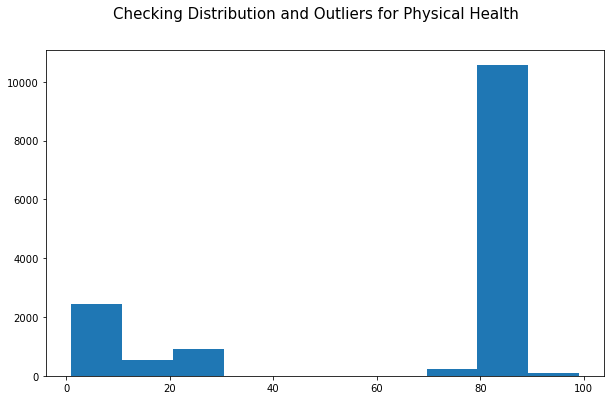

In [10]:
# Visualize our plot space to see  outliers in the original df
plt.figure(figsize=[10,6])
plt.suptitle("Checking Distribution and Outliers for Physical Health", size=15)

# histogram for phshlth 
plt.hist(df1['PHYSHLTH'])

**Data Preparation for the 'PHYSHLTH' columns**

In [11]:
# Use value counts to check the survey distribution in the PHYSHLTH column

df1['PHYSHLTH'].value_counts()

88.0    10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
77.0      248
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
99.0       81
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [12]:
#checking for Nan

df1['PHYSHLTH'].isna().sum()

0

In [13]:
# cleaning the column PHYSHLTH

df1['PHYSHLTH'] = df1['PHYSHLTH'].replace(88, 0)

In [14]:
#df1 ['PHYSHLTH'] column after cleaning

df1['PHYSHLTH']

0         0.0
1        14.0
2         0.0
3         5.0
4         0.0
         ... 
14764     0.0
14765     0.0
14766     2.0
14767     0.0
14768     0.0
Name: PHYSHLTH, Length: 14769, dtype: float64

(array([ 2441.,   538.,   896.,     0.,     0.,     0.,     0.,   248.,
        10565.,    81.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

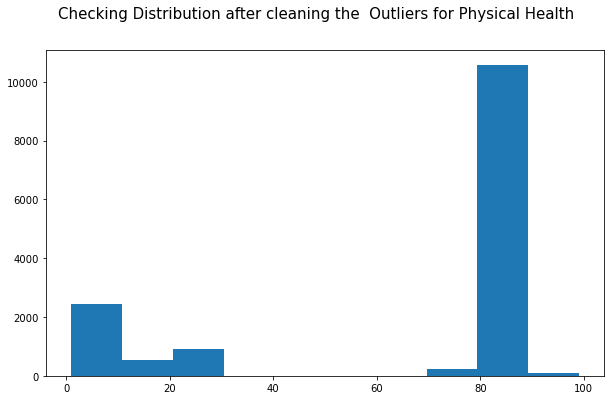

In [15]:
# Visualize our plot space after first cleaning of PHYSHLTH column.
plt.figure(figsize=[10,6])
plt.suptitle("Checking Distribution after cleaning the  Outliers for Physical Health", size=15)

# histogram for physhlth 
plt.hist(df['PHYSHLTH'])

In [16]:
# Filter df for PHYSHLTH response less or equal to 30 days

df1 = df1[df1['PHYSHLTH'] <= 30]

In [17]:
df['PHYSHLTH'].value_counts()

88.0    10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
77.0      248
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
99.0       81
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

(array([11572.,   891.,   301.,   246.,   173.,   206.,   155.,    30.,
           63.,   803.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

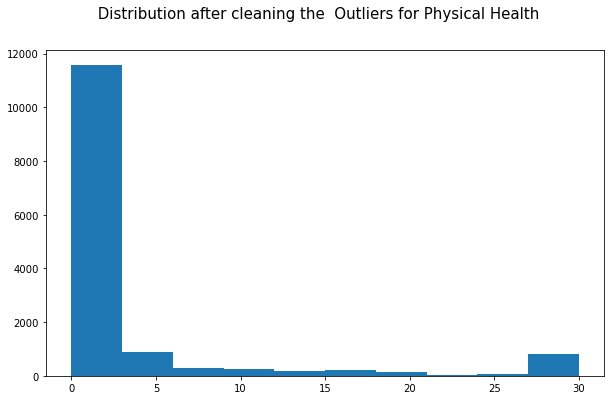

In [18]:
# Visualization after all cleaning were done in PHYSHLTH column 
# initialize our plot space.
plt.figure(figsize=[10,6])
plt.suptitle(" Distribution after cleaning the  Outliers for Physical Health", size=15)

#histogram for physhlth 
plt.hist(df1['PHYSHLTH'])

In [19]:
#the PHYSHTH Mean  and other aggregation after cleaning

df1['PHYSHLTH'].describe()

count    14440.000000
mean         3.083795
std          7.592715
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

**Data Preparation for the 'RENTHOM1' columns**

In [20]:
# RENTHOM1 before cleaning 
df1['RENTHOM1']

0        2.0
1        1.0
2        2.0
3        3.0
4        2.0
        ... 
14764    2.0
14765    2.0
14766    2.0
14767    2.0
14768    3.0
Name: RENTHOM1, Length: 14440, dtype: float64

In [21]:
# Use value counts to check the survey distribution in the RENTHOM1 column before cleaning

df1['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
3.0     585
9.0     141
7.0      55
Name: RENTHOM1, dtype: int64

In [22]:
#the RENTHOM1 Mean the other aggregation before cleaning
df1['RENTHOM1'].describe()

count    14440.000000
mean         1.542521
std          0.995171
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: RENTHOM1, dtype: float64

In [23]:
#checking for Nan
df1['RENTHOM1'].isna().sum()

0

In [24]:
 # cleaning the colums RENTHOM1
#dropping records with values of RENTHOM1 other than 1 or 2. 

df1 = df1[df1['RENTHOM1'] <= 2]

In [25]:
# Use value counts to check the survey distribution in the RENTHOM1 column after cleaning

df1['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

In [26]:
#the RENTHOM1 Mean and the other aggregation  after cleaning
df1['RENTHOM1'].describe()

count    13659.000000
mean         1.381141
std          0.485685
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: RENTHOM1, dtype: float64

In [27]:
#checking df1 after both columns were completly cleaned

df1.head()

,PHYSHLTH,RENTHOM1
0,0.0,2.0
1,14.0,1.0
2,0.0,2.0
4,0.0,2.0
5,2.0,2.0


## 2. Calculate Confidence Interval for PHYSHLTH Mean

**Code to calculate a 95% confidence interval about the mean of PHYSHLTH**

In [28]:
# Define a sample from the NY PHYSHLTH

sample = df1['PHYSHLTH']

In [29]:
# Sample mean
sample_mean = sample.mean()

# Sample Standard Deviation
sample_std = sample.std()

# Sample Standard Error
se = stats.sem(sample)

# Sample Size
sample_size = len(sample)
print(sample_mean)
print(sample_std)
print(sample_size)
print(se)

3.064646020938575
7.581325164851767
13659
0.06486877124338632


In [30]:
stats.t.interval(
    alpha=0.95,           # Confidence level
    df=sample_size -1,    # Degrees of freedom
    loc=sample_mean,     # Sample mean
    scale=se # Unit scale for t-distribution
)

(2.9374942974789744, 3.1917977443981758)

**Interpretation**

* With a sample size of df1[PHYSHLTH], we are 95% confident that the true mean of the 'PHYSHLTH' will fall within the range of 2.9 and 3.1(about 3.2)

## 3. Describe Difference in PHYSHLTH Based on RENTHOM1

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

**We are trying to split the data so we can understand the relationship between having a chronic health and the ability of owning a house.**

In [31]:
# code to separate the records based on the value of RENTHOM1

#compare physical health base on renthom1
df2 = df1.copy()
df2['RENTHOM1'] = df2['RENTHOM1'].map({1: "Own", 2: "Rent"})
df2['RENTHOM1'] 

0        Rent
1         Own
2        Rent
4        Rent
5        Rent
         ... 
14763    Rent
14764    Rent
14765    Rent
14766    Rent
14767    Rent
Name: RENTHOM1, Length: 13659, dtype: object

In [32]:
df2 = df2[df2['PHYSHLTH'] <= df2['PHYSHLTH'].quantile(.95)]

In [33]:
# Filter df for how many days of physical health New Yorkers have unweil between 2020-2021

# Select subsets(df for homeowners and df for renting)

homeowner = df2[df2['RENTHOM1']=='Own']['PHYSHLTH']

renting = df2[df2['RENTHOM1']=='Rent']['PHYSHLTH']

In [34]:
# we can groupby to find aggregation

df2.groupby('RENTHOM1')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
RENTHOM1,,,,,,,,
Own,8453.0,2.675855,7.108881,0.0,0.0,0.0,0.0,30.0
Rent,5206.0,3.695928,8.253077,0.0,0.0,0.0,2.0,30.0


**Code to produce one or more plots that show the value of PHYSHLTH based on the value of RENTHOM1**

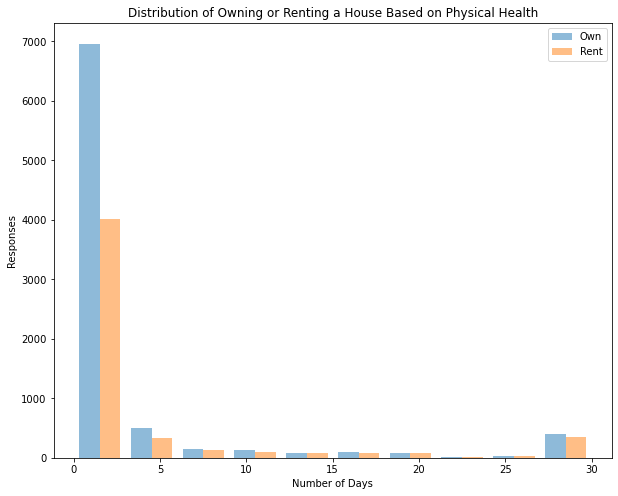

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(x=[homeowner, renting], label=['Own','Rent'],alpha=.5)

# Customize appearance
ax.set_xlabel("Number of Days")
ax.set_ylabel("Responses")
ax.set_title("Distribution of Owning or Renting a House Based on Physical Health")

ax.legend();

Distribution of Owning **vs** Renting a House Based on Physical Health

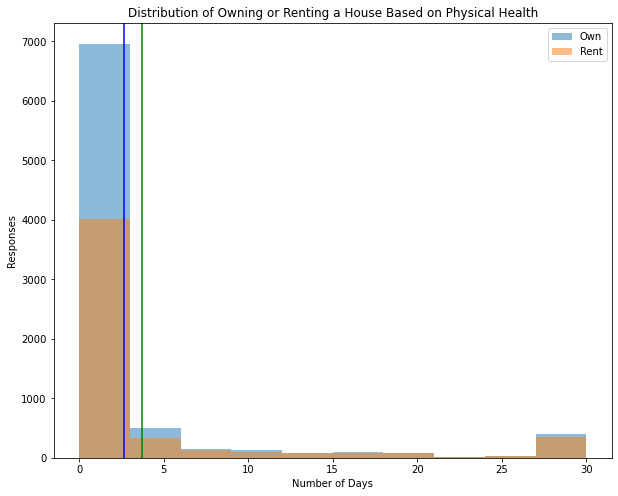

In [36]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(x=homeowner, label= 'Own', alpha=.5)
ax.hist(x=renting, label= 'Rent', alpha=.5)

# Customize appearance
ax.set_xlabel("Number of Days")
ax.set_ylabel("Responses")
ax.set_title("Distribution of Owning or Renting a House Based on Physical Health")

ax.axvline(homeowner.mean(), color='b')
ax.axvline(renting.mean(), color='g')
ax.legend();

**Interpretation**
    
 The survey shows that initially when in good health, there were twice as much homeowners than home renters. As their health condition degrades, the number of both owners and renters decreases considerably. As they slowly recover towards the end of the days , we see that their ability to own or rent gradually picked up. This shows how health condition influences the ability to own or rent a home during the pandemic.   
    

## 4. Perform t-Test on PHYSHLTH Based on RENTHOM1

### Is the Difference Statistically Significant?

- **Null**: There is no significant difference between the average number of days sick for homeowners and renters.
- **Alternative**: There is a significant difference between the average number of days sick for homeowners and renters.
- **Type I**: we come to the conclusion that average number of homeowners is different than average number of people who rent, when they are in fact the same (false positive).
- **Type II**: we come to the conclusion that average number of homeowner  is the same as the average number of people who rent a home, when they are in fact different (false negative).
- **Test Type**: we will run a  two-tailed(two-sample() independent t-test on PHYSHLTH Based to RENTHOM1.

**Code to calculate the test statistic and p-value for a t-test**

In [37]:
# recall df for how many days of physical health New Yorkers have been unweil between 2020-2021

homeowner = df2[df2['RENTHOM1']=='Own']['PHYSHLTH']
renting = df2[df2['RENTHOM1']=='Rent']['PHYSHLTH']

In [38]:
import statistics

homeowner_sample = statistics.variance(homeowner)
renting_sample = statistics.variance(renting)

print("Variance of Renter sample: ", renting_sample)
print("Variance of Owner sample: ", homeowner_sample)


Variance of Renter sample:  68.11328600746275
Variance of Owner sample:  50.53618574888828


In [39]:
# Now find the t-test and results
results = stats.ttest_ind(homeowner, renting, equal_var=False, alternative='two-sided')
results

Ttest_indResult(statistic=-7.388322797834266, pvalue=1.6084644296491685e-13)

In [40]:
# finding the p-value and print it 
p_val = results[1]
print('P value of t test: ', p_val)

P value of t test:  1.6084644296491685e-13


  **Interpretation**
    
Using an alpha (significance level) of .05, yes we can reject the Null Hypothesis because the p-value of 1.6e-13
is lower.

 ## 5. Describe Next Steps


The MENTHLH feature from the CDC codebook is an important comnponent I would like to propose to investigate next. 
With the covid-19 pandemic, people were living in an extended period indoors, which has cause a lot of mental illness. This CDC Survey enable us to measure the degree 
to which recent housing circumstances has directly contributed to people's mental health due to the deterioration of physical health.
    
    #ref.[article: Exploring the well-being of renters during covid-19 pandemic-]